# 1er TP de sistemas inteligentes

Nombre:

Este trabajo práctico se aprueba completando más del 70% del mismo. Una vez completado el notebook y reenvielo al email 2329034@ucc.edu.ar. Importante: Asegurese que su correo haya llegado.

### Entender el problema

El hundimiento del Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, considerado ampliamente "insumergible", se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y tripulantes.

Si bien hubo cierto elemento de suerte en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

    Siendo la clase positiva la indicación qué la persona sobrevive ¿Qué le estaría pidiendo a mi clasificador qué tenga en cuenta si le pido un puntaje de precision alto?

## <10%>
Respuesta: Lo que le estaria pidiendo al clasificador, es que identifique correctamente las personas que sobrevivieron y basicamente que no se equivoque mucho al realizar este procedimeinto. Basicaente que tenga un nivel alto de precision para poder clasificar las personas que sobrevivieron al accidente.

### Obtención de datos
Importe las librerías a utilizar:

In [14]:
import pandas as pd



Importe los datos:

In [2]:
#url = ""
#df = pd.read_csv(url)
#Comento por una cuestion de convension
url = 'https://gitlab.com/francisco.arduh/datasets/-/raw/main/Titanic-Dataset.csv'
titanic_data = pd.read_csv(url)

#Aca desplegamos la tabla para visualizat basicamente los datos que tenemos en el dataset
display(titanic_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## <10%> Realice una exploración de los datos, compruebe si existe faltante de datos en alguna columna, que tipo de distribución tienen los datos, si alguna columna tiene muchos datos únicos.

Exploracion de datos
En esta instancia lo que hare es revisar dentro del display de datos de arriba,
verificar que datos son nulos, clasificar las caracteristicas, ya sean numericas o categoricas,etc.

-Podemos determinar que en la columna Age,Cabin y Embarked existen datos nulos

-Podemos identificar que no todas las caracteristicas son numericas, por lo que
con OneHotEncoder, LabelEncoder, entre otras clases podremos convertirlos en numericas


In [3]:
#Paso de explotacion de datos



# Ver información general del dataset
print(titanic_data.info())

# Verificar si hay datos faltantes
print(titanic_data.isnull().sum())

# Estadísticas descriptivas del dataset
print(titanic_data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

## <5%> Separar X_train, y_train, X_test, y_test

En este paso lo que haremos es separar los datos de entrenamiento y de prueba, en este paso dividimos el dataset en dos partes, una de entrenamiento, que serian las caracteristicas y se entrenaria y prueba que serian los datos que usariamos para evaluar el rendimeinto del modelo. La idea es medir que tan bien generaliza el modelo, es decir que tan bien predice ante datos nuevos o que no vio anteriormente.

-Divido en X (caracteristicas) e Y (Etiquetas o variable objetivo), basicamente para que en X queden los datos que vamos a entrenar y en Y los datos de la variable objetivo para luego evaluar el rendimeinto 

In [4]:
from sklearn.model_selection import train_test_split
X=titanic_data.drop(['Survived', 'PassengerId','Name'], axis=1)
Y=titanic_data['Survived']
#Verifico que se haya eliminado la columna Survived en X
print(X.head())
#Verifico que se haya guardado en Y la columna Survived
print(Y.head())


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

   Pclass     Sex   Age  SibSp  Parch            Ticket     Fare Cabin  \
0       3    male  22.0      1      0         A/5 21171   7.2500   NaN   
1       1  female  38.0      1      0          PC 17599  71.2833   C85   
2       3  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN   
3       1  female  35.0      1      0            113803  53.1000  C123   
4       3    male  35.0      0      0            373450   8.0500   NaN   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


Para seguir ahondando en el dataset, haremos una serie de histogramas y graficos que nos permitiran analizar la relacion de sus caracteristicas

     Pclass     Sex   Age  SibSp  Parch            Ticket     Fare Cabin  \
140       3  female   NaN      0      2              2678  15.2458   NaN   
439       2    male  31.0      0      0        C.A. 18723  10.5000   NaN   
817       2    male  31.0      1      1   S.C./PARIS 2079  37.0042   NaN   
378       3    male  20.0      0      0              2648   4.0125   NaN   
491       3    male  21.0      0      0  SOTON/OQ 3101317   7.2500   NaN   
..      ...     ...   ...    ...    ...               ...      ...   ...   
835       1  female  39.0      1      1          PC 17756  83.1583   E49   
192       3  female  19.0      1      0            350046   7.8542   NaN   
629       3    male   NaN      0      0            334912   7.7333   NaN   
559       3  female  36.0      1      0            345572  17.4000   NaN   
684       2    male  60.0      1      1             29750  39.0000   NaN   

    Embarked  Survived  
140        C         0  
439        S         0  
817        C

array([[<AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Survived'}>]], dtype=object)

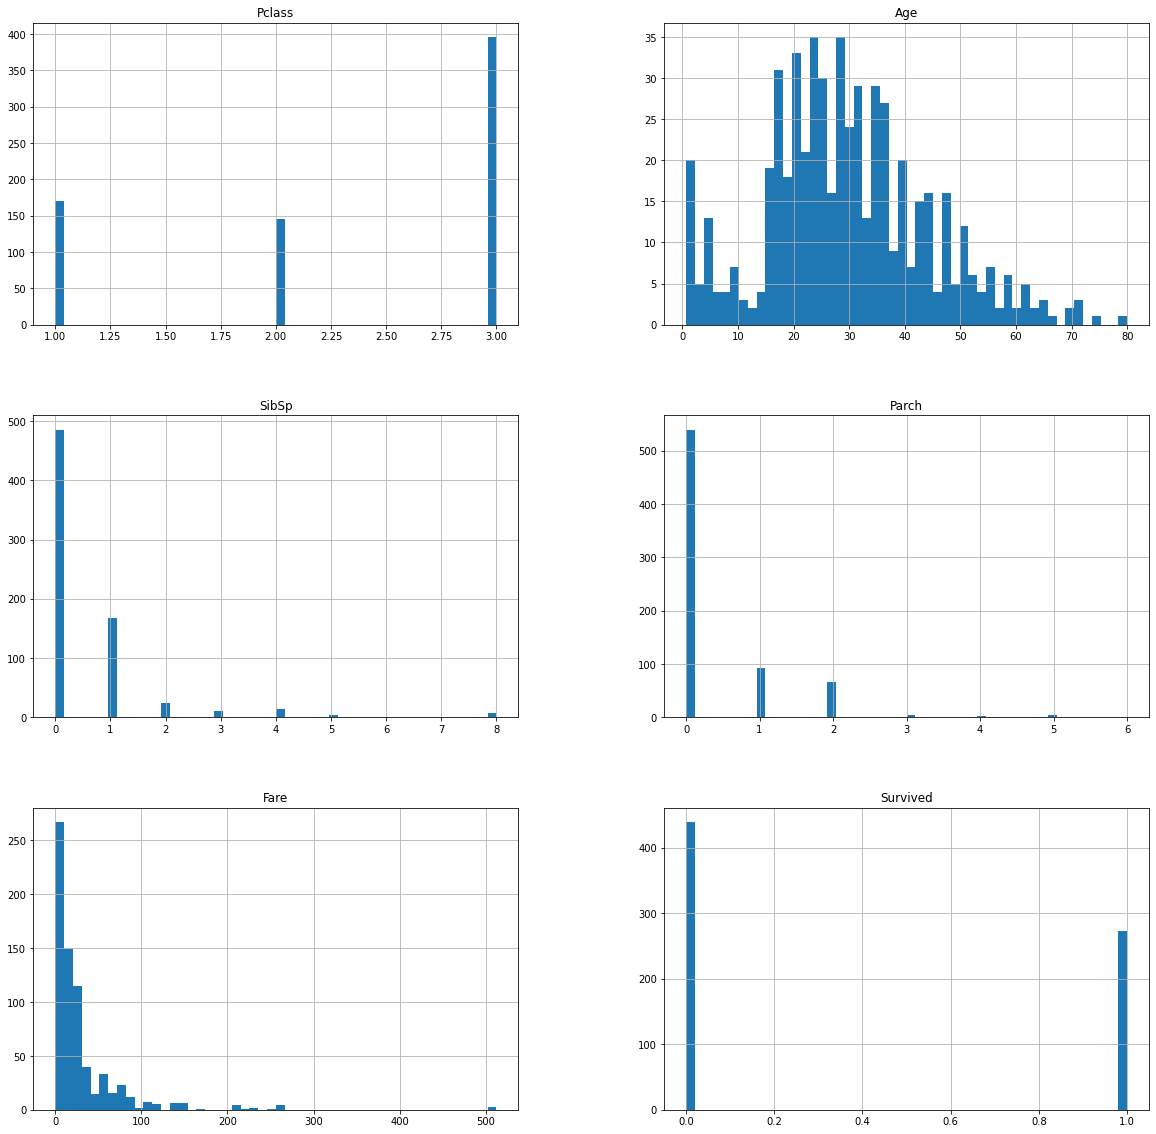

In [5]:

#Uno los datos de entrenamiento y prueba
train_data= x_train.join(y_train)
print(train_data)

#Genero histograma
train_data.hist(bins=50,figsize=(20,20))

Tambien podemos generar la correlacion para poder atarnos de la variable objetivo y podemos analizar la relacion de las diferentes variables, determinar como funcionan los datos.


In [6]:
#Hago la correlacion con respecto a la variable objetivo

corr=train_data.corr()
print(corr['Survived'].sort_values(ascending=False))

Survived    1.000000
Fare        0.229665
Parch       0.081027
SibSp      -0.047006
Age        -0.101539
Pclass     -0.314294
Name: Survived, dtype: float64


/tmp/ipykernel_9028/3366060072.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=train_data.corr()


/tmp/ipykernel_9028/3710170011.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu', ax=ax)


<AxesSubplot:>

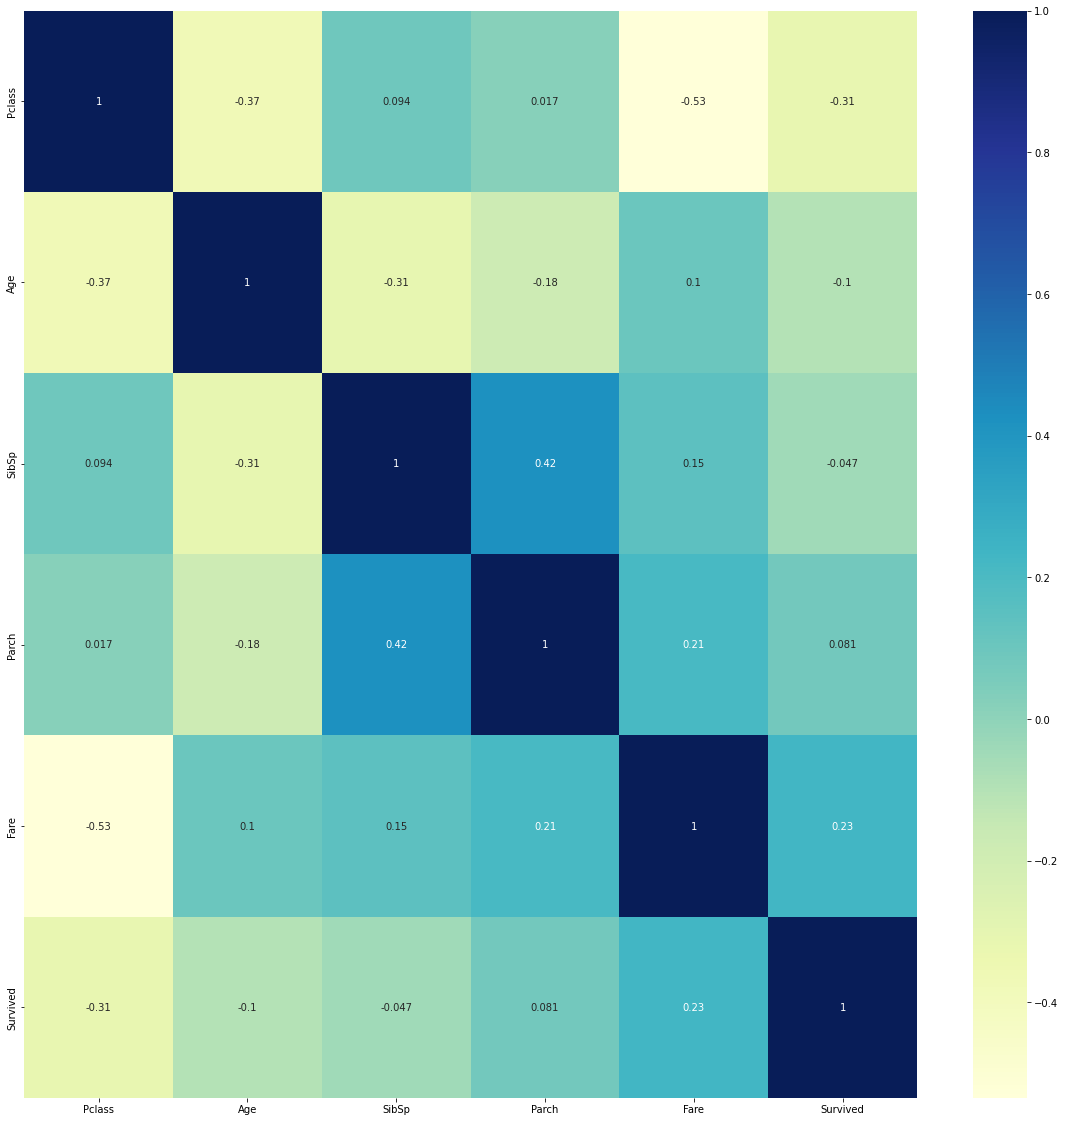

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns 
#seguimos con la exploracion de los datos, realizo un 
# heat map para ver la correlacion entre las variables de forma grafica
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu', ax=ax)

### Procesado y transformación de datos
## <10%> ¿Qué transformaciones debería aplicar? Especifique y justifique por grupo de columnas.

Por ejemplo: columna A, B y C aplicaría transformación X porque ...

Escriba los nombres de las columna en una lista por cada grupo:


Una vez visualizado los datos. Por columnas voy a expresar que transformacion haria

Columnas:

1)  Sex,Name,Embarked,Ticket: Aplicaria una transformacion con la clase OneHotEncoder o LabelEncoder porque son variables categoricas y no son continuas o no siguen un orden
2) Cabin contiene datos nulos, tengo varias opciones, borrar todas las filas que sean nulas
o usar el imputter para que a todos los valores que sean nulos, le calculo la media de ese resultado pero si es categorico antes deberia convertirlo a numerico. 



<15%> A continuación escriba el código para realizar las transformaciones transformaciones

In [13]:
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.calibration import LabelEncoder



#Aplico one hot encoding

# Creamos un objeto encoder para codificar las características categóricas mediante one-hot encoding
encoder = OneHotEncoder()

# Aplicamos la codificación a un conjunto de datos
X_encoded = encoder.fit_transform(X)

# Creamos un objeto encoder para codificar las características categóricas mediante encoding ordinal
encoder = OrdinalEncoder()

# Aplicamos la codificación a un conjunto de datos
X_encoded = encoder.fit_transform(X)

display(X_encoded.head())

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [9]:
#2 Esta columna Cabin, es relevante para determinar si sobrevivio o no. Entonces
#convierto la variable categorica a numerica y le aplico la media para reemplazar 
# los valores faltantes
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')

# Aplicamos la imputación a un conjunto de datos
X_imputed = imputer.fit_transform(X)
X['Age'] = X['Age'].fillna(X['Age'].mean())
X['Fare'].fillna(X['Fare'].median(), inplace=True)
print(X.isnull().sum())

display(X.head())

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'male'

### Selección de modelo y entrenamiento
 


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
cla_log = LogisticRegression()
cla_rf = RandomForestClassifier()

## <15%>Utilice validación cruzada para evaluar los modelos que se importaron. Utilice el de area bajo la curva roc mas alto.
Utilizar el metodo "cross_val_predict", tenga en cuenta que la variable, "method" para el LogisticRegression es "decision_function" y para RandomForestClassifier es "predict_proba" (ver clase o libro)

Bien abajo

## <10%>¿Por qué lo eligiria el modelo por el area bajo la curva roc?

Porque sirve para evaluar el desempeño que tiene un modelo, en este caso de clasificacion binaria, ayuda a ver la capacidad que tenemos para distinguir entre las clases positivas y negativas, sin importar el umbral que se uso. 

Por ejemplo: apartir de los verdaderos positivos, que seria en este caso al tasa para clasificar correctamente a las personas que sobrevivieron y los falsos positivos para determinar cuantas veces el modelo predice mal. Entonces si vemos la curva roc, vamos a elegir el que mayor area tenga bajo la curva porque quiere decir que tiene mas verdaderos positivos.

Entonces determinamos que el mejor es random forest




In [ ]:
# Aca verifico lo que hice abajo para determinar que modelo es mejor, en base al area bajo la curva ROC
#Y tambien evaluo el modelo con validacion cruzada
# Crear el clasificador RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
# RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]
roc_auc_forest = roc_auc_score(y_train, y_scores_forest)

# LogisticRegression
log_clf = LogisticRegression(random_state=42)
y_scores_log = cross_val_predict(log_clf, x_train, y_train, cv=3, method="decision_function")
roc_auc_log = roc_auc_score(y_train, y_scores_log)


print("scores Forest: ", y_scores_forest)
print("scores Log: ", y_scores_log)


print("AUC-ROC RandomForestClassifier: ", roc_auc_forest)
print("AUC-ROC LogisticRegression: ", roc_auc_log)
#Hago la comparacion de los modelos
if roc_auc_forest > roc_auc_log:
    print("El modelo RandomForestClassifier tiene mejor AUC-ROC")
else:
    print("El modelo LogisticRegression tiene mejor AUC-ROC")
    

scores Forest:  [0.71       0.04       0.21       0.2        0.02       0.12
 0.22       0.89       0.         0.08       0.96       0.75
 0.33       0.62       0.9        0.58       0.41       0.02
 0.65       0.34666667 0.03       0.         0.65       0.02
 0.64       0.         0.28       0.75       0.25       0.8
 0.         0.         0.53       0.09       0.61       0.29
 0.         0.434      0.48       0.21       0.98       0.
 0.9        0.72       0.         0.35       0.08       0.
 0.6        0.1        0.04       0.19       0.96       0.63
 0.92       0.16       0.26       0.95       0.91       0.71
 0.02       0.45       0.99       0.21       0.24       0.94
 0.8        0.82       0.         0.01       0.87       0.
 0.02       0.63666667 0.         0.14       0.53       0.94
 0.01       0.07       0.01       0.         0.525      0.02
 0.09       0.18       0.38       0.47       0.08       0.29
 0.93       0.12       0.16       0.59       0.43       0.42
 0.         0.2

/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [ ]:
#from sklearn.calibration import cross_val_predict
#from sklearn.metrics  import accuracy_score

#from sklearn.discriminant_analysis import StandardScaler
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score

#cla_log = LogisticRegression()

#cla_rf = RandomForestClassifier()
#y_train_1=(y_train==1)
#y_test_1=(y_test==1)



#Aqui calculo con cross_val_score, abajo esta con el predict y el Random tiene mas area debajo de la curva

#x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#Creo una variable de clasificacion
y_train_1=(y_train==1)
y_test_1=(y_test==1)


#Selecciono el modelo de clasificacion
#model=RandomForestClassifier()

#Entreno el modelo
#model_train=model.fit(x_train,y_train_1)
#determino el valor en la region de entrenamiento con score
#pred_train=model_train.score(x_train,y_train)
#print("Valor en la region de entrenamiento con random: ",pred_train)

#Predigo los datos
#y_test_pred=model.predict(x_test)


#Validacion cruzada
#crossAccuracy=cross_val_predict(model,X,Y,cv=5)
#print("Validacion cruzada con random: : ",crossAccuracy)


#print("Valor en la region de prueba con random: ",accuracy_score(y_test_1,y_test_pred))


#Ahora voy a usar el modelo de regresion logistica



## <15>Utilice el metodo grid search sobre el modelo elegido  
en caso de ser LogisticRegression
```
param_grid = [
{'C': [0.1, 1, 10], 'penalty': ['elasticnet'], 'l1_ratio': [0.,0.2,0.4]}
]
```
en caso de ser RandomForest utilize:
```
param_grid = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]
```
¿Cuál es el sentido de hacer esto?

-El sentido de ajustar los hiperparametros, es encontrar una combinacion de los parametros que permita optimizar el rendimiento que tenemos en nuestro modelo sobre un conjunto de datos. Este ayuda a la precision, reduce y ayuda a evitar el riesgo de el overfitting, entre otros beneficios. A continuacion ajusto los hiperparametros de RandomForest

In [ ]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
param_grid = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]

#defino la funcion de busqueda en cuadricula
GridSearch=GridSearchCV(RandomForestClassifier(),param_grid,cv=3,scoring='accuracy')
#entreno el modelo en funcion de busqueda de cuadricula
GridSearch.fit(x_train,y_train_1)

#Busco los mejores hiperparametros 
best_params=GridSearch.best_params_
#Re entreno con los mejores parametros

#Defino el mejor modelo, el ** es para pasarle los datos de los hiperparametros
best_model=RandomForestClassifier(**best_params,random_state=42)
#Defino el mejor pipeline
best_pipeline = make_pipeline(
    StandardScaler(),
    best_model
)
#Re entreno el modelo
best_pipeline.fit(x_train, y_train_1)
accuracy=cross_val_score(best_pipeline,x_train,y_train_1,cv=5,scoring='accuracy')
print("Random con hiperparametros: ",accuracy)

#hago el display de X nomas para verificar
display(X)

Random con hiperparametros:  [0.76923077 0.83916084 0.82394366 0.81690141 0.83098592]


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,523,7.2500,147,2
1,1,0,38.000000,1,0,596,71.2833,81,0
2,3,0,26.000000,0,0,669,7.9250,147,2
3,1,0,35.000000,1,0,49,53.1000,55,2
4,3,1,35.000000,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,101,13.0000,147,2
887,1,0,19.000000,0,0,14,30.0000,30,2
888,3,0,29.699118,1,2,675,23.4500,147,2
889,1,1,26.000000,0,0,8,30.0000,60,0


Todo lo que sigue es la representacion de los graficos

In [ ]:
#Genero la matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_pred=cross_val_predict(RandomForestClassifier(),x_train,y_train_1,cv=3)
confusion_matrix(y_train_1,y_pred)

array([[385,  54],
       [ 78, 195]])

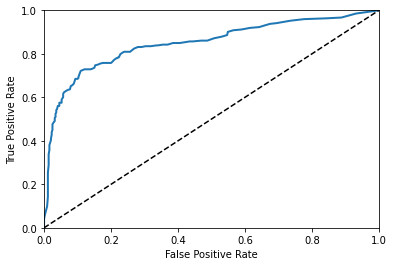

In [ ]:
#Implementamos ROC curve
from sklearn.metrics import roc_curve


# Obtener las probabilidades de la clase positiva mediante validación cruzada
y_probas_forest = cross_val_predict(RandomForestClassifier(), x_train, y_train_1, cv=3, method="predict_proba")

# Seleccionar sólo la probabilidad de la clase positiva
y_scores_forest = y_probas_forest[:, 1]


# Calcular la tasa de falsos positivos (fpr), tasa de verdaderos positivos (tpr) y 
# umbrales para la curva ROC
#por parametros se le pasa el score que esta en la feature anterior
fpr, tpr, thresholds = roc_curve(y_train_1, y_scores_forest)

# Definir una función para graficar la curva ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)  # Graficar la curva ROC
    plt.plot([0, 1], [0, 1], 'k--')  
    plt.axis([0, 1, 0, 1])  
    plt.xlabel('False Positive Rate')  
    plt.ylabel('True Positive Rate')  
# Graficar la curva ROC utilizando la función definida
plot_roc_curve(fpr, tpr)
plt.show()

## <5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de validación

Para hacerlo en la region de validacion, donde hago la validacion cruzada, obtengo las predicciones del modelo en las iteraciones y eso lo remplazo en las funciones para accuracy,presicion,recall,f1 etc

In [ ]:
import sklearn


print("Accuracy:", sklearn.metrics.accuracy_score(y_train, y_pred))

print("Recall:", sklearn.metrics.recall_score(y_train, y_pred))

print("F1:", sklearn.metrics.f1_score(y_train, y_pred))

print("Auc_Roc:", sklearn.metrics.roc_auc_score(y_train, y_pred))
#Esta es la opcion de rama

-----------------------------------------------------------------
RandomForestClassifier

Accuracy RandomForestClassifier:  [0.78151261 0.83544304 0.82278481]
AUC-ROC para RandomForestClassifier:  0.8529583552362596
Largo >0,5:  242
Largo total:  712
RandomForestClassifier con scores > 0.5:
Precision RandomForestClassifier:  0.7892561983471075
Recall RandomForestClassifier:  0.6996336996336996
F1-score RandomForestClassifier:  0.741747572815534
-----------------------------------------------------------------
LogisticRegression

Accuracy LogisticRegression:  [0.7605042  0.79324895 0.80168776]
AUC-ROC para LogisticRegression:  0.8179345331964921
LogisticRegression con scores > 0.5:
Precisión Logistic: 0.8
Recall Logistic: 0.5714285714285714
F1-score Logistic:  0.6666666666666666 

-----------------------------------------------------------------


/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

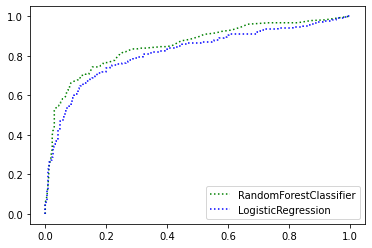

In [ ]:
#Impleentamos la Precision y recall
# Crear el clasificador RandomForestClassifier
from sklearn.metrics import f1_score, precision_recall_fscore_support, precision_score, recall_score, roc_auc_score

print("-----------------------------------------------------------------")
print("RandomForestClassifier\n")
forest_clf = RandomForestClassifier(random_state=42)

# Obtener las probabilidades 
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_1, cv=3, method="predict_proba")

# Seleccionar sólo la probabilidad de la clase positiva
y_scores_forest = y_probas_forest[:, 1]


# Sacar la precisión mediante validación cruzada
accuracy_forest = cross_val_score(forest_clf, x_train, y_train_1, cv=3, scoring='accuracy')
print("Accuracy RandomForestClassifier: ", accuracy_forest)
# Calcular la curva ROC y el área bajo la curva ROC
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_1, y_scores_forest)
roc_auc_forest = roc_auc_score(y_train_1, y_scores_forest)
print("AUC-ROC para RandomForestClassifier: ", roc_auc_forest)
print("Largo >0,5: ",len(y_scores_forest[y_scores_forest > 0.5]))
print("Largo total: ",len(y_probas_forest))
#Ahora calculo el precision, recall, f1-score, para los scores >0,5
# calcular las métricas
precision, recall, f1, _ = precision_recall_fscore_support(y_train_1, y_scores_forest > 0.5, average='binary')
#quiero printear y_scores_forest > 5

print("RandomForestClassifier con scores > 0.5:")
print("Precision RandomForestClassifier: ", precision)
print("Recall RandomForestClassifier: ", recall)
print("F1-score RandomForestClassifier: ", f1)

print("-----------------------------------------------------------------")
print("LogisticRegression\n")
# Crear el clasificador LogisticRegression
log_clf = LogisticRegression(random_state=42)
# Obtener el score 
y_scores_log = cross_val_predict(log_clf, x_train, y_train_1, cv=3, method="decision_function")
y_pred_log = (y_scores_log > 0.5)

#Calculo el accuracy
accuracy_logistic= cross_val_score(log_clf, x_train, y_train_1, cv=3, scoring='accuracy')
print("Accuracy LogisticRegression: ", accuracy_logistic)

# Calcular la curva ROC y el área bajo la curva ROC
fpr_log, tpr_log, thresholds_log = roc_curve(y_train_1, y_scores_log)
roc_auc_log = roc_auc_score(y_train_1, y_scores_log)
print("AUC-ROC para LogisticRegression: ", roc_auc_log)
# Calcular precisión, recall y f1-score para los scores > 0.5
precision_log = precision_score(y_train_1, y_pred_log)
recall_log = recall_score(y_train_1, y_pred_log)
f1_log = f1_score(y_train_1, y_pred_log)

print("LogisticRegression con scores > 0.5:")
print("Precisión Logistic:", precision_log)
print("Recall Logistic:", recall_log)
print("F1-score Logistic: ", f1_log ,"\n")

print("-----------------------------------------------------------------")
# Graficar la curva ROC para comparar
plt.plot(fpr_forest, tpr_forest, "g:", label="RandomForestClassifier")
plt.plot(fpr_log, tpr_log, "b:", label="LogisticRegression")
plt.legend(loc="lower right")
plt.show()

Aca en el grafico de arriba podemos ver que random forest tiene un area debajo de la curva mas grande que logistic, abajo calculo la metrica del area bajo la curva de ambos modelos para verificar y efectivamente
RandomForest tiene: 0.8529583552362596
Logistic tiene: 0.8179345331964921

In [ ]:
#esto no creo que sea
from sklearn.metrics import f1_score
#Valores de precision y recall
gridsearch_y_predict=GridSearch.predict(x_train)
#print("Array: ", gridsearch_y_predict)
#Accuracy
acc=accuracy_score(y_train_1,gridsearch_y_predict)
print("Accuracy: ",acc)

#Recall
recall=recall_score(y_train_1,gridsearch_y_predict)
print("Recall: ",recall)

#F1 score
f1_score=f1_score(y_train_1,gridsearch_y_predict)
print("F1 score: ",f1_score)

#Curva roc

roc_auc = roc_auc_score(y_train, gridsearch_y_predict)


print("Roc: ",roc_auc)

Accuracy:  0.9985955056179775
Recall:  1.0
F1 score:  0.9981718464351006
Roc:  0.998861047835991


    <5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de test, 
    ¿Los números son parecido a lo obtenido en las regiones de validación? ¿A qué puede deberse?
    No , no me variaron mucho, estimo que es porque los dos conjuntos provienen de la misma distribucion y veo que algunas metricas son mejores , pero calculo que es porque los datos de prueba pueden ser mas facil de clasificar que los de entrenamiento.

-----------------------------------------------------------------
RandomForestClassifier

Accuracy RandomForestClassifier:  [0.78151261 0.83544304 0.82278481]
AUC-ROC para RandomForestClassifier:  0.8908432147562583
Largo >0,5:  68
Largo total:  179
RandomForestClassifier con scores > 0.5:
Precision:  0.8235294117647058
Recall:  0.8115942028985508
F1-score:  0.8175182481751825
-----------------------------------------------------------------
LogisticRegression

Accuracy LogisticRegression:  [0.7605042  0.79324895 0.80168776]
AUC-ROC para LogisticRegression:  0.847957839262187
LogisticRegression con scores > 0.5:
Precisión Logistic: 0.8108108108108109
Recall Logistic: 0.43478260869565216
F1-score Logistic:  0.5660377358490566 

-----------------------------------------------------------------


/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

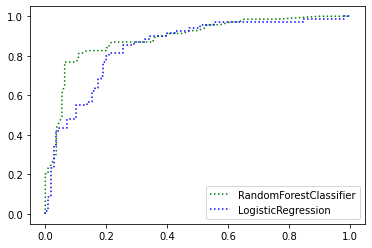

In [ ]:
#Impleentamos la Precision y recall
# Crear el clasificador RandomForestClassifier
from sklearn.metrics import f1_score, precision_recall_fscore_support, precision_score, recall_score, roc_auc_score

print("-----------------------------------------------------------------")
print("RandomForestClassifier\n")
forest_clf = RandomForestClassifier(random_state=42)
# Sacar las probabilidades 
y_probas_forest = cross_val_predict(forest_clf, x_test, y_test_1, cv=3, method="predict_proba")
# Seleccionar sólo la probabilidad de la clase positiva
y_scores_forest = y_probas_forest[:, 1]

# Sacar la precisión mediante validación cruzada
accuracy_forest = cross_val_score(forest_clf, x_train, y_train_1, cv=3, scoring='accuracy')
print("Accuracy RandomForestClassifier: ", accuracy_forest)
# Calcular la curva ROC y el área bajo la curva ROC
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test_1, y_scores_forest)
roc_auc_forest = roc_auc_score(y_test_1, y_scores_forest)
print("AUC-ROC para RandomForestClassifier: ", roc_auc_forest)
print("Largo >0,5: ",len(y_scores_forest[y_scores_forest > 0.5]))
print("Largo total: ",len(y_probas_forest))

#Ahora calculo el precision, recall, f1-score, para los scores >0,5
# calcular las métricas
precision, recall, f1, _ = precision_recall_fscore_support(y_test_1, y_scores_forest > 0.5, average='binary')
#quiero printear y_scores_forest > 5
print("RandomForestClassifier con scores > 0.5:")
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

print("-----------------------------------------------------------------")
print("LogisticRegression\n")
# Crear el clasificador LogisticRegression
log_clf = LogisticRegression(random_state=42)
# Sacar el score de decisión mediante validación cruzada
y_scores_log = cross_val_predict(log_clf, x_test, y_test_1, cv=3, method="decision_function")
y_pred_log = (y_scores_log > 0.5)

#Calculo el accuracy
accuracy_logistic= cross_val_score(log_clf, x_train, y_train_1, cv=3, scoring='accuracy')
print("Accuracy LogisticRegression: ", accuracy_logistic)
# Calcular la curva ROC y el área bajo la curva ROC
fpr_log, tpr_log, thresholds_log = roc_curve(y_test_1, y_scores_log)
roc_auc_log = roc_auc_score(y_test_1, y_scores_log)
print("AUC-ROC para LogisticRegression: ", roc_auc_log)
# Calcular precisión, recall y f1-score para los scores > 0.5
precision_log = precision_score(y_test_1, y_pred_log)
recall_log = recall_score(y_test_1, y_pred_log)
f1_log = f1_score(y_test_1, y_pred_log)

print("LogisticRegression con scores > 0.5:")
print("Precisión Logistic:", precision_log)
print("Recall Logistic:", recall_log)
print("F1-score Logistic: ", f1_log ,"\n")

print("-----------------------------------------------------------------")

# Graficar la curva ROC para comparar
plt.plot(fpr_forest, tpr_forest, "g:", label="RandomForestClassifier")
plt.plot(fpr_log, tpr_log, "b:", label="LogisticRegression")
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_test_pred = cross_val_predict(cla_rf, x_test, y_test, cv = 3)
conf_mx = confusion_matrix(y_test, y_test_pred)
conf_mx
#confusion

array([[98, 12],
       [13, 56]])

In [ ]:
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_test_pred))

print("Recall:", sklearn.metrics.recall_score(y_test, y_test_pred))

print("F1:", sklearn.metrics.f1_score(y_test, y_test_pred))

print("Auc_Roc:", sklearn.metrics.roc_auc_score(y_test, y_test_pred))
#rama 

Accuracy: 0.8603351955307262
Recall: 0.8115942028985508
F1: 0.8175182481751825
Auc_Roc: 0.8512516469038208
